# WeatherPy

---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


In [3]:
#list of cities for reference
cities

['bilibino',
 'hermanus',
 'badger',
 'margaret river',
 'kodiak',
 'tuy hoa',
 'lihue',
 'ushuaia',
 'hillsboro',
 'port-aux-francais',
 'kingston',
 'grytviken',
 'papao',
 'agdam',
 'longyearbyen',
 'constantia',
 'arar',
 'sinabang',
 'ola',
 'thinadhoo',
 'saint-philippe',
 'bardai',
 'port elizabeth',
 'rikaze',
 'invercargill',
 'we',
 'nadym',
 'aransas pass',
 'talnakh',
 'ondjiva',
 'ribeira grande',
 'hawaiian paradise park',
 'whitehorse',
 'bredasdorp',
 'sisimiut',
 'kulia village',
 'seosan',
 'qaqortoq',
 'maceio',
 'waitangi',
 'port mathurin',
 'san luis de la loma',
 'taiohae',
 'watsa',
 'iqaluit',
 'enewetak',
 'georgetown',
 'saipan',
 'carbonear',
 'pombas',
 'okhotsk',
 'bandarbeyla',
 'bethel',
 'dhuusamarreeb',
 'wailua homesteads',
 'palikir - national government center',
 'dudinka',
 'sinop',
 'hithadhoo',
 'arias',
 'bela vista',
 'albany',
 'port alfred',
 'prince rupert',
 'edinburgh of the seven seas',
 'kargil',
 'rouissat',
 'hasaki',
 'yanam',
 'colle

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL (never include personal API)
url = "http://api.openweathermap.org/data/2.5/weather?"

In [8]:
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["weather"][0]["description"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | badger
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | kodiak
Processing Record 6 of Set 1 | tuy hoa
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | hillsboro
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | kingston
Processing Record 12 of Set 1 | grytviken
Processing Record 13 of Set 1 | papao
Processing Record 14 of Set 1 | agdam
Processing Record 15 of Set 1 | longyearbyen
Processing Record 16 of Set 1 | constantia
Processing Record 17 of Set 1 | arar
Processing Record 18 of Set 1 | sinabang
Processing Record 19 of Set 1 | ola
Processing Record 20 of Set 1 | thinadhoo
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | bardai
Processing Record 23 of Set 1 | port elizab

Processing Record 40 of Set 4 | lompoc
Processing Record 41 of Set 4 | timana
Processing Record 42 of Set 4 | belle fourche
Processing Record 43 of Set 4 | kidal
Processing Record 44 of Set 4 | colares
Processing Record 45 of Set 4 | fale old settlement
Processing Record 46 of Set 4 | ilulissat
Processing Record 47 of Set 4 | st. john's
Processing Record 48 of Set 4 | kiunga
Processing Record 49 of Set 4 | ahau
City not found. Skipping...
Processing Record 0 of Set 5 | queenstown
Processing Record 1 of Set 5 | alofi
Processing Record 2 of Set 5 | santa ana
Processing Record 3 of Set 5 | ciudad bolivar
Processing Record 4 of Set 5 | coxen hole
Processing Record 5 of Set 5 | minas de marcona
Processing Record 6 of Set 5 | prado
Processing Record 7 of Set 5 | rio grande
Processing Record 8 of Set 5 | espargos
City not found. Skipping...
Processing Record 9 of Set 5 | machiques
Processing Record 10 of Set 5 | avarua
Processing Record 11 of Set 5 | isafjordur
Processing Record 12 of Set 5 |

Processing Record 29 of Set 8 | am djarass
City not found. Skipping...
Processing Record 30 of Set 8 | azovo
Processing Record 31 of Set 8 | devinuwara
City not found. Skipping...
Processing Record 32 of Set 8 | banposh
Processing Record 33 of Set 8 | port macquarie
Processing Record 34 of Set 8 | tocoa
Processing Record 35 of Set 8 | bandar
Processing Record 36 of Set 8 | vila velha
Processing Record 37 of Set 8 | saratamata
City not found. Skipping...
Processing Record 38 of Set 8 | bulayevo
Processing Record 39 of Set 8 | vingt cinq
City not found. Skipping...
Processing Record 40 of Set 8 | cuatro cienegas de carranza
Processing Record 41 of Set 8 | al jawf
Processing Record 42 of Set 8 | outapi
City not found. Skipping...
Processing Record 43 of Set 8 | sa'dah
Processing Record 44 of Set 8 | vuktyl
Processing Record 45 of Set 8 | garoowe
Processing Record 46 of Set 8 | shitanjing
Processing Record 47 of Set 8 | qapqal
City not found. Skipping...
Processing Record 48 of Set 8 | vre

City not found. Skipping...
Processing Record 14 of Set 12 | black point
Processing Record 15 of Set 12 | kapoeta
Processing Record 16 of Set 12 | bilara
Processing Record 17 of Set 12 | bay city
Processing Record 18 of Set 12 | feijo
Processing Record 19 of Set 12 | linhai
Processing Record 20 of Set 12 | urangan
Processing Record 21 of Set 12 | golfito
Processing Record 22 of Set 12 | nezhinka
Processing Record 23 of Set 12 | miki
Processing Record 24 of Set 12 | vorkuta
Processing Record 25 of Set 12 | sirte
Processing Record 26 of Set 12 | fedorovskiy
Processing Record 27 of Set 12 | tangalle
Processing Record 28 of Set 12 | folkston
Processing Record 29 of Set 12 | hacienda huancane
Processing Record 30 of Set 12 | algeciras
Processing Record 31 of Set 12 | ban talat bueng
Processing Record 32 of Set 12 | roslavl'
Processing Record 33 of Set 12 | kununurra
Processing Record 34 of Set 12 | bethanie
Processing Record 35 of Set 12 | gamba
Processing Record 36 of Set 12 | harstad
Proc

In [9]:
#convert the cities weather data into a pandas dataframe
city_data_df = pd.DataFrame(city_data)

#extract
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

#display count df
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,18.15,58,3,0.78,RU,clear sky
1,hermanus,-34.4187,19.2345,14.89,82,97,4.99,ZA,overcast clouds
2,badger,64.8000,-147.5333,17.12,84,100,2.06,US,overcast clouds
3,margaret river,-33.9500,115.0667,16.23,69,100,6.74,AU,overcast clouds
4,kodiak,57.7900,-152.4072,11.73,94,75,0.00,US,broken clouds


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [12]:
#original
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,18.15,58,3,0.78,RU,clear sky
1,hermanus,-34.4187,19.2345,14.89,82,97,4.99,ZA,overcast clouds
2,badger,64.8000,-147.5333,17.12,84,100,2.06,US,overcast clouds
3,margaret river,-33.9500,115.0667,16.23,69,100,6.74,AU,overcast clouds
4,kodiak,57.7900,-152.4072,11.73,94,75,0.00,US,broken clouds


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

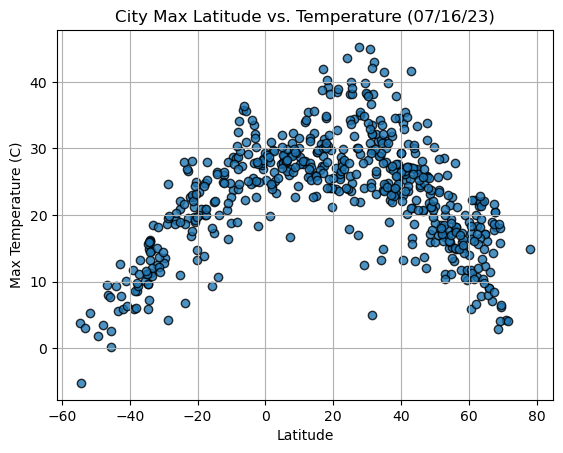

In [13]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolor="black",
           linewidths=1, marker="o", alpha=0.8,
           label="Cities")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

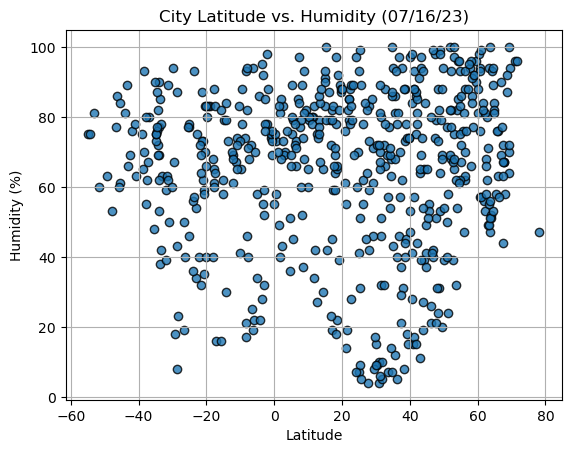

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolor= "black",
           linewidths=1, marker="o", alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

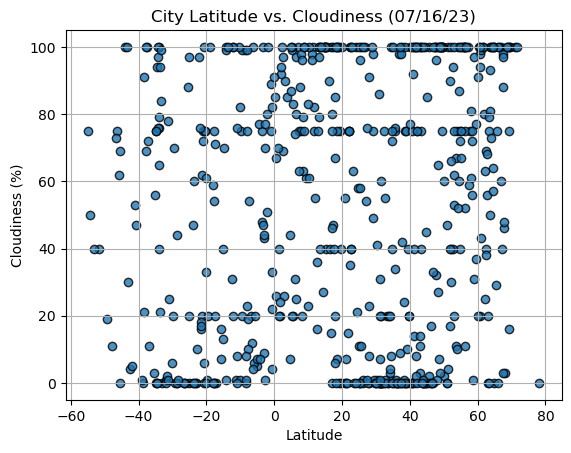

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolor = "black",
           linewidths=1, marker="o", alpha = 0.8,
           label = "Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

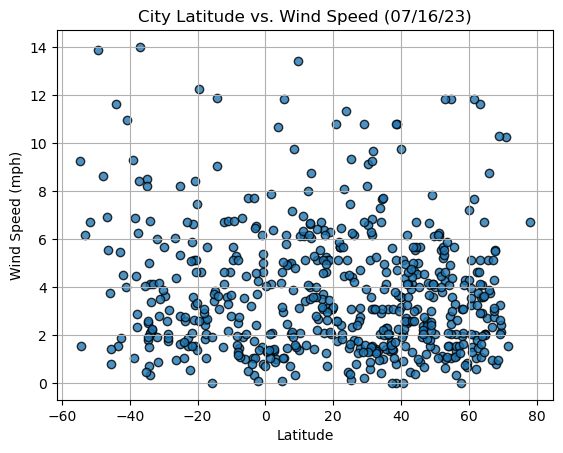

In [16]:
#latitude vs. wind speed
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor= "black", linewidths=1,
           marker="o", alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [17]:
# Define a function to create Linear Regression plots
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,18.15,58,3,0.78,RU,clear sky
2,badger,64.8000,-147.5333,17.12,84,100,2.06,US,overcast clouds
4,kodiak,57.7900,-152.4072,11.73,94,75,0.00,US,broken clouds
5,tuy hoa,13.0833,109.3000,26.04,79,100,3.98,VN,overcast clouds
6,lihue,21.9789,-159.3672,25.77,79,75,5.66,US,light rain


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,hermanus,-34.4187,19.2345,14.89,82,97,4.99,ZA,overcast clouds
3,margaret river,-33.9500,115.0667,16.23,69,100,6.74,AU,overcast clouds
7,ushuaia,-54.8000,-68.3000,3.81,75,75,9.26,AR,broken clouds
9,port-aux-francais,-49.3500,70.2167,1.88,63,19,13.89,TF,few clouds
11,grytviken,-54.2811,-36.5092,-5.24,75,50,1.55,GS,scattered clouds


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.39


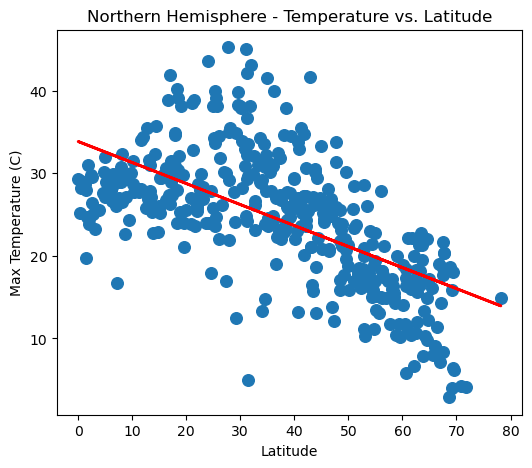

In [25]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(6,5))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# temp vs. lat linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#values
regress_values = x_values * slope + intercept

#string
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, marker = 'o', s=[70])
plt.plot(x_values,regress_values, 'red', linewidth=2)
plt.title('Northern Hemisphere - Temperature vs. Latitude')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
#plt.annotate(line_eq,(1,1), fontsize=18, color='red')

#plt.ylim(min(northern_hemi_df['Max Temp'])-10, max(northern_hemi_df['Max Temp'])+10)
#plt.xlim(-3, max(northern_hemi_df['Lat'])+3)

#print
print(f'The r-value is: {round(rvalue**2,2)}')

#show
plt.show()

**Discussion about the linear relationship:** 
There is a strong negative correlation between latitude and maximum temperature on the Northern Hemisphere. When a city is further from the equator the lower the maximum temperatures you will see.

The r-value is: 0.74


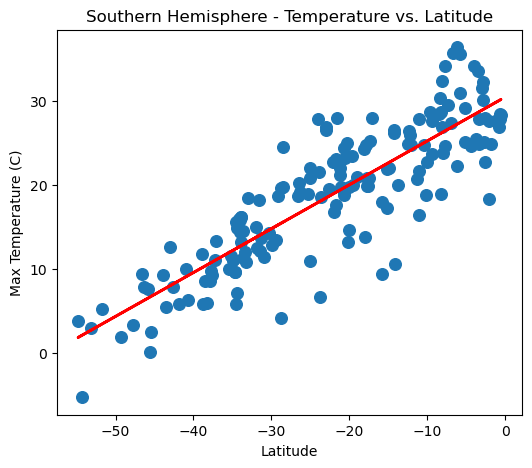

In [26]:
# Linear regression on Northern Hemisphere
plt.figure(figsize=(6,5))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# temp vs. lat linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#values
regress_values = x_values * slope + intercept

#string
line_eq = 'y =' + str(round(slope,2)) + 'x +' + str(round(intercept,2))

#plot
plt.scatter(x_values, y_values, marker = 'o', s=[70])
plt.plot(x_values,regress_values, 'red', linewidth=2)
plt.title('Southern Hemisphere - Temperature vs. Latitude')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

#print
print(f'The r-value is: {round(rvalue**2,2)}')

#show
plt.show()

**Discussion about the linear relationship:** 
There is a strong positive correlation between latitude and maximum temperature on the Southern Hemisphere. When a city is closer to the equator the higher the maximum temperatures you will see. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.01


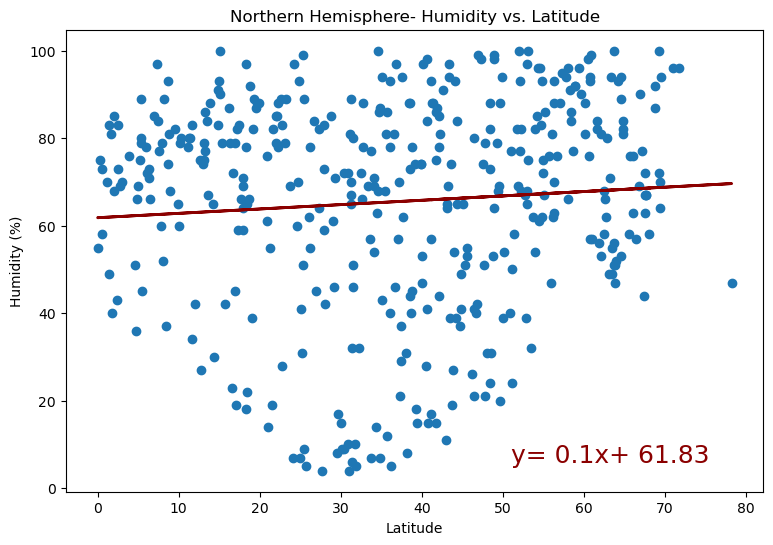

In [27]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# humidity vs. latitude linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#values
regress_values = x_values * slope + intercept

#string
line_eq = 'y= ' + str(round(slope,2)) + 'x+ ' + str(round(intercept,2))

#create plot
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values,regress_values,'darkred',linewidth=2)
plt.title('Northern Hemisphere- Humidity vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(51,6),fontsize=18,color='darkred')

#print r-squared
print(f'The r-value is: {round(rvalue**2,2)}')


**Discussion about the linear relationship:** There is no linear relationship between Humidity and Latitude on the Northern Hemisphere.

The r-value is: 0.01


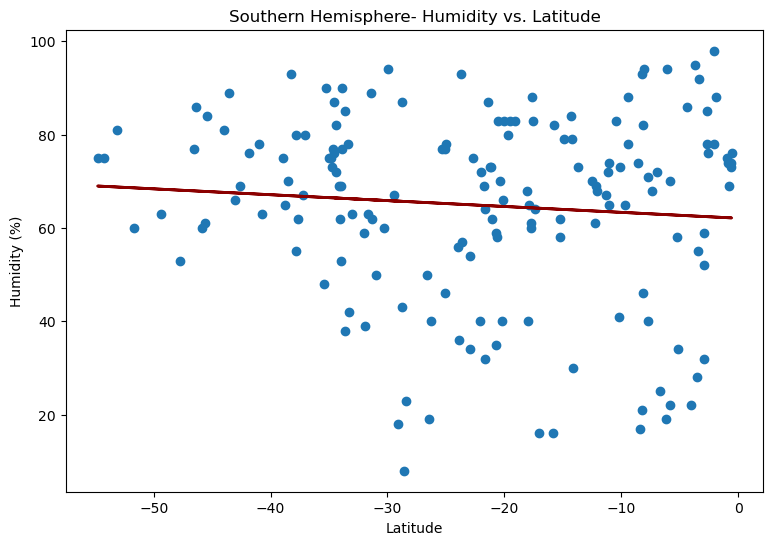

In [28]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# humidity vs. latitude linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#values
regress_values = x_values * slope + intercept

#string
line_eq = 'y= ' + str(round(slope,2)) + 'x+ ' + str(round(intercept,2))

#create plot
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values,regress_values,'darkred',linewidth=2)
plt.title('Southern Hemisphere- Humidity vs. Latitude')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.annotate(line_eq,(51,6),fontsize=18,color='darkred')

#print r-squared
print(f'The r-value is: {round(rvalue**2,2)}')

**Discussion about the linear relationship:** There is no linear relationship between Humidity and Latitude on the Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0


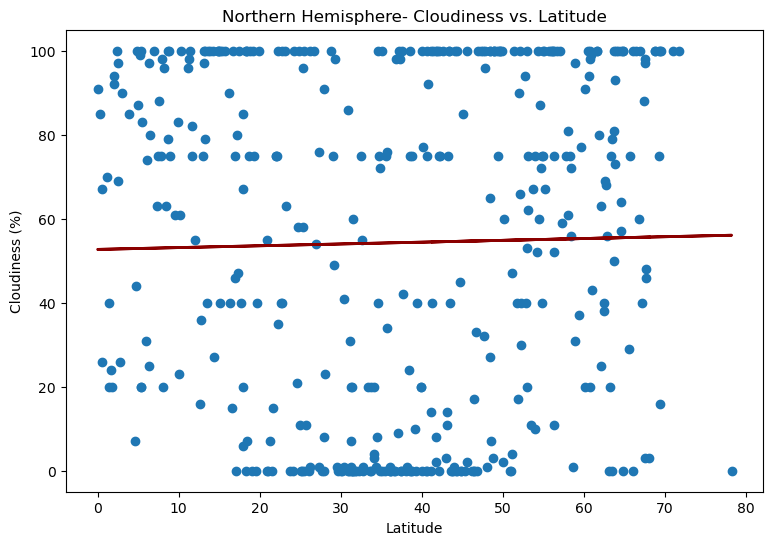

In [29]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

# humidity vs. latitude linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#values
regress_values = x_values * slope + intercept

#string
line_eq = 'y= ' + str(round(slope,2)) + 'x+ ' + str(round(intercept,2))

#create plot
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values,regress_values,'darkred',linewidth=2)
plt.title('Northern Hemisphere- Cloudiness vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

#print r-squared
print(f'The r-value is: {round(rvalue**2,2)}')

**Discussion about the linear relationship:** There is no liner relationship between cloudiness and latitude in the Northern Hemisphere.

The r-value is: 0.0


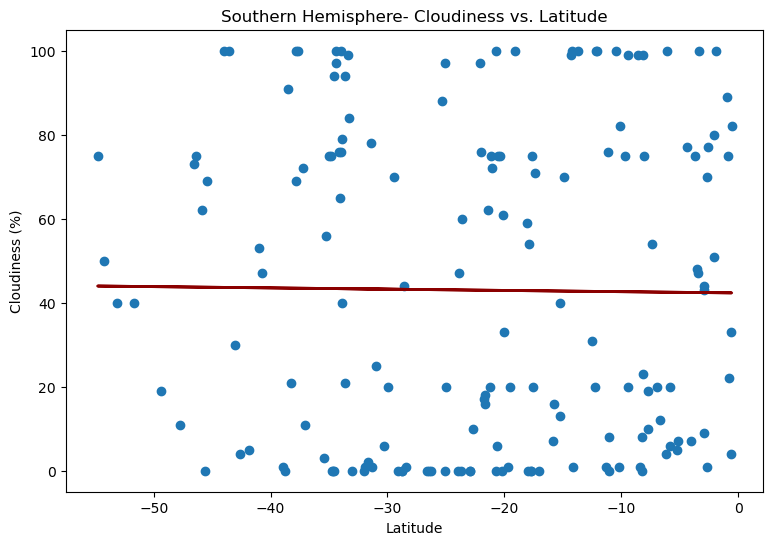

In [30]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# humidity vs. latitude linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#values
regress_values = x_values * slope + intercept

#string
line_eq = 'y= ' + str(round(slope,2)) + 'x+ ' + str(round(intercept,2))

#create plot
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values,regress_values,'darkred',linewidth=2)
plt.title('Southern Hemisphere- Cloudiness vs. Latitude')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

#print r-squared
print(f'The r-value is: {round(rvalue**2,2)}')

**Discussion about the linear relationship:** There is no liner relationship between cloudiness and latitude in the Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0


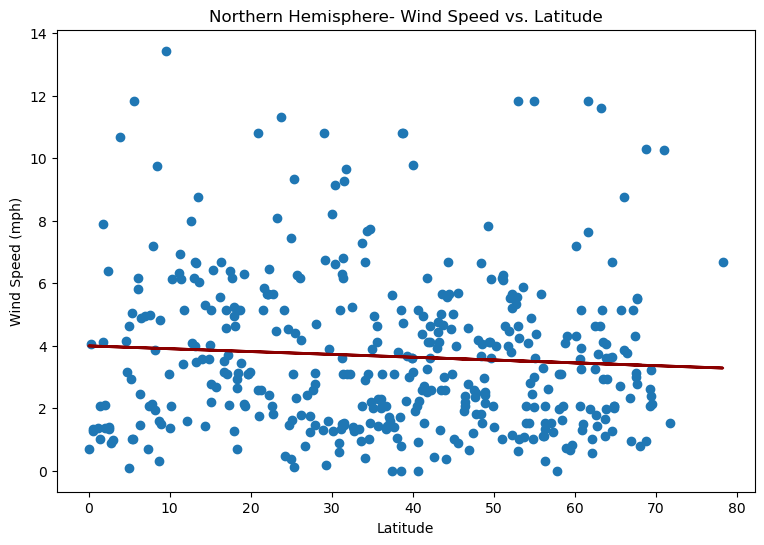

In [31]:
# Northern Hemisphere
plt.figure(figsize=(9,6))
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

# humidity vs. latitude linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#values
regress_values = x_values * slope + intercept

#string
line_eq = 'y= ' + str(round(slope,2)) + 'x+ ' + str(round(intercept,2))

#create plot
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values,regress_values,'darkred',linewidth=2)
plt.title('Northern Hemisphere- Wind Speed vs. Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

#print r-squared
print(f'The r-value is: {round(rvalue**2,2)}')


**Discussion about the linear relationship:** There is no linear relationship between wind speed and latitude in the Northern Hemisphere.

The r-value is: 0.04


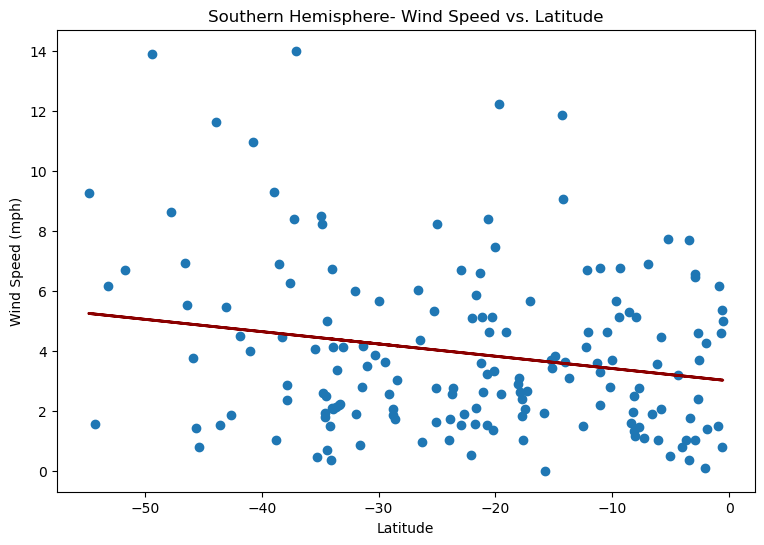

In [33]:
# Southern Hemisphere
plt.figure(figsize=(9,6))
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# humidity vs. latitude linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

#values
regress_values = x_values * slope + intercept

#string
line_eq = 'y= ' + str(round(slope,2)) + 'x+ ' + str(round(intercept,2))

#create plot
plt.scatter(x_values, y_values, marker='o')
plt.plot(x_values,regress_values,'darkred',linewidth=2)
plt.title('Southern Hemisphere- Wind Speed vs. Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

#print r-squared
print(f'The r-value is: {round(rvalue**2,2)}')

**Discussion about the linear relationship:** There is no linear relationship between wind speed and latitude in the Southern Hemisphere.